In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if needed
import folium

In [2]:
#setting the needed information to call Foursquare API

CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [3]:
#setting the location to be searched, search word, and limits on results

toronto_lat = 43.653963
toronto_lon = -79.387207
search_query = 'Hotel'
radius = 500
limit_hotels = 50

In [4]:
#url to be used forr calling the API

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, toronto_lat, toronto_lon, VERSION, search_query, radius, limit_hotels)
url

'https://api.foursquare.com/v2/venues/search?client_id=CNTR5AX4ENVQG0F5PJDPKWWSODAXDOYMZ10CBMSG03KJEAOZ&client_secret=CXZCYJ321QOXL3WFR5PH1WZVUGSZXPPDSANPIYJEUQ4P1HGT&ll=43.653963,-79.387207&v=20180605&query=Hotel&radius=500&limit=50'

In [5]:
results = requests.get(url).json()

In [6]:
# assign relevant part of JSON to venues
hotels = results['response']['venues']

# tranform venues into a dataframe
hotels_df = json_normalize(hotels)
hotels_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b68aed1f964a520de862be3,The Rex Hotel Jazz & Blues Bar,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",v-1611159359,False,194 Queen St W,Queen & St. Patrick,43.650505,-79.388577,"[{'label': 'display', 'lat': 43.65050475544005...",400,M5V 1Z1,CA,Toronto,ON,Canada,"[194 Queen St W (Queen & St. Patrick), Toronto...",62225795,NaN
1,4ab2d511f964a5209b6c20e3,Sheraton Centre Toronto Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1611159359,False,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,NaN
2,4f343a31e4b0230a3b337a90,VFM Test Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1611159359,False,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,NaN
3,52ce14b0498e50457ce11780,DoubleTree by Hilton Hotel Toronto Downtown,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1611159359,False,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,NaN
4,4f53fb2ee4b036244bea152f,Stathcona Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1611159359,False,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,NaN


In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in hotels_df.columns if col.startswith('location.')] + ['id']
hotels_df_filtered = hotels_df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
hotels_df_filtered['categories'] = hotels_df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
hotels_df_filtered.columns = [column.split('.')[-1] for column in hotels_df_filtered.columns]

hotels_df_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,The Rex Hotel Jazz & Blues Bar,Jazz Club,194 Queen St W,Queen & St. Patrick,43.650505,-79.388577,"[{'label': 'display', 'lat': 43.65050475544005...",400,M5V 1Z1,CA,Toronto,ON,Canada,"[194 Queen St W (Queen & St. Patrick), Toronto...",NaN,4b68aed1f964a520de862be3
1,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,4ab2d511f964a5209b6c20e3
2,VFM Test Hotel,Hotel,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,4f343a31e4b0230a3b337a90
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,52ce14b0498e50457ce11780
4,Stathcona Hotel,Hotel,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4f53fb2ee4b036244bea152f
5,Sheraton Centre Toronto Hotel - Grand Ballroom,Ballroom,123 Queen Street West,at Bay Street,43.651200,-79.384520,"[{'label': 'display', 'lat': 43.65119976208405...",376,NaN,CA,Toronto,ON,Canada,"[123 Queen Street West (at Bay Street), Toront...",Financial District,5545d07e498e2facac03f666
6,Sheraton Centre Hotel Club Lounge,Lounge,NaN,NaN,43.651063,-79.384527,"[{'label': 'display', 'lat': 43.651063, 'lng':...",388,M5H 2M9,CA,Toronto,ON,Canada,"[Toronto ON M5H 2M9, Canada]",NaN,5d59d01867339e000897bc88
7,Be SixFifty Hotel,Hotel,650 Bay Street,Elm Street,43.657120,-79.384560,"[{'label': 'display', 'lat': 43.65711975097656...",411,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,53e3f70c498e8221abc0db4c
8,650 Hotel,Hotel,650 Bay Street,Elm Street,43.657046,-79.384411,"[{'label': 'display', 'lat': 43.65704642307161...",410,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,55de0cf9498e74d841ab26c1
9,89 Chestnut Residence,College Residence Hall,89 Chestnut St.,at Armoury St.,43.654160,-79.385291,"[{'label': 'display', 'lat': 43.65415952834927...",155,M5G 1R1,CA,Toronto,ON,Canada,"[89 Chestnut St. (at Armoury St.), Toronto ON ...",NaN,4be18ce28dd062b548533e3c


In [8]:
#keeping only venues with the category "Hotel"

hotels_df_filtered = hotels_df_filtered[hotels_df_filtered.categories == 'Hotel']
hotels_df_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
1,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,4ab2d511f964a5209b6c20e3
2,VFM Test Hotel,Hotel,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,4f343a31e4b0230a3b337a90
3,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,52ce14b0498e50457ce11780
4,Stathcona Hotel,Hotel,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4f53fb2ee4b036244bea152f
7,Be SixFifty Hotel,Hotel,650 Bay Street,Elm Street,43.657120,-79.384560,"[{'label': 'display', 'lat': 43.65711975097656...",411,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,53e3f70c498e8221abc0db4c
8,650 Hotel,Hotel,650 Bay Street,Elm Street,43.657046,-79.384411,"[{'label': 'display', 'lat': 43.65704642307161...",410,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,55de0cf9498e74d841ab26c1
10,Op mijn hotelkamer In Toronto,Hotel,NaN,NaN,43.654235,-79.386208,"[{'label': 'display', 'lat': 43.654235, 'lng':...",85,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4e1632f31f6eb653a5e4aa66
11,Marriott Downtown at CF Toronto Eaton Centre,Hotel,525 Bay Street,NaN,43.654728,-79.382422,"[{'label': 'display', 'lat': 43.65472844428402...",394,M5G 2L2,CA,Toronto,ON,Canada,"[525 Bay Street, Toronto ON M5G 2L2, Canada]",NaN,4b0563c0f964a5200e5822e3
12,Hilton,Hotel,145 Richmond St W,at University Ave,43.649946,-79.385479,"[{'label': 'display', 'lat': 43.6499459, 'lng'...",468,M5H 2L2,CA,Toronto,ON,Canada,"[145 Richmond St W (at University Ave), Toront...",NaN,4a9d0a53f964a520d23720e3
19,Shangri-La Toronto,Hotel,188 University Ave.,at Adelaide St. W,43.649129,-79.386557,"[{'label': 'display', 'lat': 43.64912919417502...",540,M5H 0A3,CA,Toronto,ON,Canada,"[188 University Ave. (at Adelaide St. W), Toro...",NaN,4e31b74252b131dcebb08743


In [9]:
#resetting index

hotels_df_filtered.reset_index(drop=True, inplace=True)
hotels_df_filtered.head(10)

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,4ab2d511f964a5209b6c20e3
1,VFM Test Hotel,Hotel,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,4f343a31e4b0230a3b337a90
2,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,52ce14b0498e50457ce11780
3,Stathcona Hotel,Hotel,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4f53fb2ee4b036244bea152f
4,Be SixFifty Hotel,Hotel,650 Bay Street,Elm Street,43.657120,-79.384560,"[{'label': 'display', 'lat': 43.65711975097656...",411,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,53e3f70c498e8221abc0db4c
5,650 Hotel,Hotel,650 Bay Street,Elm Street,43.657046,-79.384411,"[{'label': 'display', 'lat': 43.65704642307161...",410,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,55de0cf9498e74d841ab26c1
6,Op mijn hotelkamer In Toronto,Hotel,NaN,NaN,43.654235,-79.386208,"[{'label': 'display', 'lat': 43.654235, 'lng':...",85,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4e1632f31f6eb653a5e4aa66
7,Marriott Downtown at CF Toronto Eaton Centre,Hotel,525 Bay Street,NaN,43.654728,-79.382422,"[{'label': 'display', 'lat': 43.65472844428402...",394,M5G 2L2,CA,Toronto,ON,Canada,"[525 Bay Street, Toronto ON M5G 2L2, Canada]",NaN,4b0563c0f964a5200e5822e3
8,Hilton,Hotel,145 Richmond St W,at University Ave,43.649946,-79.385479,"[{'label': 'display', 'lat': 43.6499459, 'lng'...",468,M5H 2L2,CA,Toronto,ON,Canada,"[145 Richmond St W (at University Ave), Toront...",NaN,4a9d0a53f964a520d23720e3
9,Shangri-La Toronto,Hotel,188 University Ave.,at Adelaide St. W,43.649129,-79.386557,"[{'label': 'display', 'lat': 43.64912919417502...",540,M5H 0A3,CA,Toronto,ON,Canada,"[188 University Ave. (at Adelaide St. W), Toro...",NaN,4e31b74252b131dcebb08743


In [10]:
#creating a map to view the resulting hotels and their locations
hotels_map = folium.Map(location=[toronto_lat, toronto_lon], zoom_start=15) # generate map centred around toronto

# add the hotels as blue circle markers
for lat, lng, label in zip(hotels_df_filtered.lat, hotels_df_filtered.lng, hotels_df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

In [11]:
#How many hotels are there near toronto city center?
hotels_df_filtered.shape

(10, 16)

In [12]:
#prepare hotels dataframe for clustering

#adding an ID number to each venue will help in re-assembling the data after clustering
id_n = list(range(1,len(hotels_df_filtered)+1))
hotels_df_filtered['id_n'] = id_n
hotels_df_filtered.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,id_n
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,4ab2d511f964a5209b6c20e3,1
1,VFM Test Hotel,Hotel,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,4f343a31e4b0230a3b337a90,2
2,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,52ce14b0498e50457ce11780,3
3,Stathcona Hotel,Hotel,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4f53fb2ee4b036244bea152f,4
4,Be SixFifty Hotel,Hotel,650 Bay Street,Elm Street,43.657120,-79.384560,"[{'label': 'display', 'lat': 43.65711975097656...",411,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,53e3f70c498e8221abc0db4c,5


In [13]:
# The dataset that will be used in K-Means clustering
X=hotels_df_filtered.loc[:,['id_n','lat','lng']]
X.head(10)

,id_n,lat,lng
0,1,43.650817,-79.384534
1,2,43.658434,-79.387894
2,3,43.654608,-79.385942
3,4,43.654947,-79.386359
4,5,43.657120,-79.384560
5,6,43.657046,-79.384411
6,7,43.654235,-79.386208
7,8,43.654728,-79.382422
8,9,43.649946,-79.385479
9,10,43.649129,-79.386557


In [14]:
#clustering the hotels based on their locations 
kmeans = KMeans(n_clusters = 3, init ='k-means++') # hotels will be clustered in 3 groups
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
centers = kmeans.cluster_centers_
print(centers) #to show coordinates of the center for each cluster 
X.head(10)

[[ 43.658434   -79.387894  ]
 [ 43.649964   -79.3855231 ]
 [ 43.65544749 -79.38498343]]


,id_n,lat,lng,cluster_label
0,1,43.650817,-79.384534,1
1,2,43.658434,-79.387894,0
2,3,43.654608,-79.385942,2
3,4,43.654947,-79.386359,2
4,5,43.657120,-79.384560,2
5,6,43.657046,-79.384411,2
6,7,43.654235,-79.386208,2
7,8,43.654728,-79.382422,2
8,9,43.649946,-79.385479,1
9,10,43.649129,-79.386557,1


In [15]:
#adding the cluster label to each venue in the hotels data frame
X = X[['id_n','cluster_label']]
clustered_hotels = hotels_df_filtered.merge(X, left_on='id_n', right_on='id_n')
clustered_hotels.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id,id_n,cluster_label
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,at York St.,43.650817,-79.384534,"[{'label': 'display', 'lat': 43.6508169, 'lng'...",411,M5H 2M9,CA,Toronto,ON,Canada,"[123 Queen Street West (at York St.), Toronto ...",NaN,4ab2d511f964a5209b6c20e3,1,1
1,VFM Test Hotel,Hotel,123 Test Drive,at somewhere St,43.658434,-79.387894,"[{'label': 'display', 'lat': 43.658434, 'lng':...",500,M2M 2M2,CA,Toronto,ON,Canada,"[123 Test Drive (at somewhere St), Toronto ON ...",NaN,4f343a31e4b0230a3b337a90,2,0
2,DoubleTree by Hilton Hotel Toronto Downtown,Hotel,108 Chestnut Street,Dundas St W,43.654608,-79.385942,"[{'label': 'display', 'lat': 43.6546083, 'lng'...",124,M5G 1R3,CA,Toronto,ON,Canada,"[108 Chestnut Street (Dundas St W), Toronto ON...",NaN,52ce14b0498e50457ce11780,3,2
3,Stathcona Hotel,Hotel,NaN,NaN,43.654947,-79.386359,"[{'label': 'display', 'lat': 43.654947, 'lng':...",129,NaN,CA,Toronto,ON,Canada,"[Toronto ON, Canada]",NaN,4f53fb2ee4b036244bea152f,4,2
4,Be SixFifty Hotel,Hotel,650 Bay Street,Elm Street,43.657120,-79.384560,"[{'label': 'display', 'lat': 43.65711975097656...",411,NaN,CA,Toronto,ON,Canada,"[650 Bay Street (Elm Street), Toronto ON, Canada]",NaN,53e3f70c498e8221abc0db4c,5,2


In [16]:
#map showing each hotel with different color based on the cluster
map_clusters = folium.Map(location=[toronto_lat, toronto_lon], zoom_start=15)

# add markers to the map
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(clustered_hotels['lat'], clustered_hotels['lng'], clustered_hotels['name'], clustered_hotels['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters #show map

In [17]:
#putting the center of each cluster in a dataframe for later analysis
centers_df = pd.DataFrame(centers, columns =['c_lat', 'c_lon'])
cluster_label = list(range(0,3))
centers_df['cluster_label'] = cluster_label
centers_df

,c_lat,c_lon,cluster_label
0,43.658434,-79.387894,0
1,43.649964,-79.385523,1
2,43.655447,-79.384983,2


In [18]:
#map of centers
map_centers = folium.Map(location=[toronto_lat, toronto_lon], zoom_start=15)

# add markers to the map in different colors according to cluster
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(centers_df['c_lat'], centers_df['c_lon'], centers_df['cluster_label'], centers_df['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_centers)
       
map_centers #display the map showing 3 markers, one for each cluster

In [19]:
#creating the url to call on foursquare API

limit_restaurants = 500

url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_lat, 
    toronto_lon, 
    radius, 
    limit_restaurants)
url2

'https://api.foursquare.com/v2/venues/explore?&client_id=CNTR5AX4ENVQG0F5PJDPKWWSODAXDOYMZ10CBMSG03KJEAOZ&client_secret=CXZCYJ321QOXL3WFR5PH1WZVUGSZXPPDSANPIYJEUQ4P1HGT&v=20180605&ll=43.653963,-79.387207&radius=500&limit=500'

In [20]:
#sving the results
results2 = requests.get(url2).json()

In [21]:
#getting the needed data and put it in a pandas dataframe
restaurants = results2['response']['groups'][0]['items']
    
restaurants_df = json_normalize(restaurants) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
restaurants_df = restaurants_df.loc[:, filtered_columns]

# filter the category for each row
restaurants_df['venue.categories'] = restaurants_df.apply(get_category_type, axis=1)

# clean columns
restaurants_df.columns = [col.split(".")[-1] for col in restaurants_df.columns]

restaurants_df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Japango,Sushi Restaurant,43.655268,-79.385165
2,Textile Museum of Canada,Art Museum,43.654396,-79.386500
3,Cafe Plenty,Café,43.654571,-79.389450
4,Poke Guys,Poke Place,43.654895,-79.385052
5,Karine's,Breakfast Spot,43.653699,-79.390743
6,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
7,The Library Specialty Coffee,Coffee Shop,43.654413,-79.390902
8,Nathan Phillips Square,Plaza,43.652270,-79.383516
9,Aboveground Art Supplies,Arts & Crafts Store,43.652646,-79.390925


In [22]:
#number of venues recieved
restaurants_df.shape

(43, 4)

In [23]:
#keeping only the venues with categories containing "Restaurant"
restaurants_df_cleaned = restaurants_df[restaurants_df['categories'].str.contains('Restaurant')].reset_index(drop=True)
print(restaurants_df_cleaned.shape) #number of restaurants
restaurants_df_cleaned.head()

(8, 4)


,name,categories,lat,lng
0,Japango,Sushi Restaurant,43.655268,-79.385165
1,Rosalinda,Vegetarian / Vegan Restaurant,43.650252,-79.385156
2,JaBistro,Sushi Restaurant,43.649687,-79.388090
3,The Elm Tree Restaurant,Modern European Restaurant,43.657397,-79.383761
4,Hakata Ikkousha Ramen,Ramen Restaurant,43.650299,-79.388753


In [24]:
#creating a map of restaurants
restaurants_map = folium.Map(location=[toronto_lat, toronto_lon], zoom_start=15) # generate map centred around toronto

# add the hotels as yellow circle markers
for lat, lng, label in zip(restaurants_df_cleaned.lat, restaurants_df_cleaned.lng, restaurants_df_cleaned.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(restaurants_map)

# display map
restaurants_map

In [25]:
#preparing the data that will be used in KNN classification
Xhat=restaurants_df_cleaned.loc[:,['lat','lng']] #classification based on the location coordinates
print(Xhat.shape) #number of restaurants
Xhat.head(10) #show dataframe

(8, 2)


,lat,lng
0,43.655268,-79.385165
1,43.650252,-79.385156
2,43.649687,-79.388090
3,43.657397,-79.383761
4,43.650299,-79.388753
5,43.655871,-79.392091
6,43.656006,-79.392494
7,43.656148,-79.392282


In [26]:
#the centers dataframe to be used for training KNN
centers_df

,c_lat,c_lon,cluster_label
0,43.658434,-79.387894,0
1,43.649964,-79.385523,1
2,43.655447,-79.384983,2


In [27]:

#selecting classification features and target variable
X_train = centers_df[['c_lat', 'c_lon']].values
Y_train = centers_df['cluster_label']

In [28]:
#importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k = 1 #classification based on the nearest center
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
#classify the restaurants based on the model created
yhat = neigh.predict(Xhat)
yhat[0:5]

array([2, 1, 1, 2, 1])

In [31]:
#putting the results in a dataframe
KNN_results = pd.DataFrame(yhat, columns=['class'])
KNN_results

,class
0,2
1,1
2,1
3,2
4,1
5,0
6,0
7,0


In [32]:
#joining the results with the restaurants dataframe
restaurants_classified = pd.concat([restaurants_df_cleaned, KNN_results], axis=1, sort=False)

In [33]:
#view resulting dataframe
restaurants_classified

,name,categories,lat,lng,class
0,Japango,Sushi Restaurant,43.655268,-79.385165,2
1,Rosalinda,Vegetarian / Vegan Restaurant,43.650252,-79.385156,1
2,JaBistro,Sushi Restaurant,43.649687,-79.388090,1
3,The Elm Tree Restaurant,Modern European Restaurant,43.657397,-79.383761,2
4,Hakata Ikkousha Ramen,Ramen Restaurant,43.650299,-79.388753,1
5,Midi Bistro,French Restaurant,43.655871,-79.392091,0
6,Omai,Japanese Restaurant,43.656006,-79.392494,0
7,Mo'Ramyun,Korean Restaurant,43.656148,-79.392282,0


In [34]:
#show restaurante in each area in different color
map_rest_class = folium.Map(location=[toronto_lat, toronto_lon], zoom_start=15)

# add markers to the map
marker_colors = ['red','green','blue']
for lat, lon, poi, cluster in zip(restaurants_classified['lat'], restaurants_classified['lng'], restaurants_classified['name'], restaurants_classified['class']):
    label = folium.Popup(str(poi) + ' Class ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=marker_colors[cluster],
        fill=True,
        fill_color=marker_colors[cluster],
        fill_opacity=0.7).add_to(map_rest_class)
       
map_rest_class

In [35]:
#count number of restaurants in each area
restaurants_count = restaurants_classified['class'].value_counts().rename_axis('class').reset_index(name='counts')
restaurants_count

,class,counts
0,1,3
1,0,3
2,2,2


In [36]:
#counting number of trending restaurants of each unique category
trending_restaurants = restaurants_classified['categories'].value_counts().rename_axis('categories').reset_index(name='counts')
trending_restaurants

,categories,counts
0,Sushi Restaurant,2
1,Japanese Restaurant,1
2,Korean Restaurant,1
3,French Restaurant,1
4,Vegetarian / Vegan Restaurant,1
5,Ramen Restaurant,1
6,Modern European Restaurant,1


In [37]:
#keeping the five most frequent categories
trending_restaurants = trending_restaurants.head()

In [38]:
#show top five categories
trending_restaurants

,categories,counts
0,Sushi Restaurant,2
1,Japanese Restaurant,1
2,Korean Restaurant,1
3,French Restaurant,1
4,Vegetarian / Vegan Restaurant,1


In [39]:
#make "categories" as index for visiualization
trending_restaurants = trending_restaurants.set_index('categories')
trending_restaurants

,counts
categories,
Sushi Restaurant,2
Japanese Restaurant,1
Korean Restaurant,1
French Restaurant,1
Vegetarian / Vegan Restaurant,1


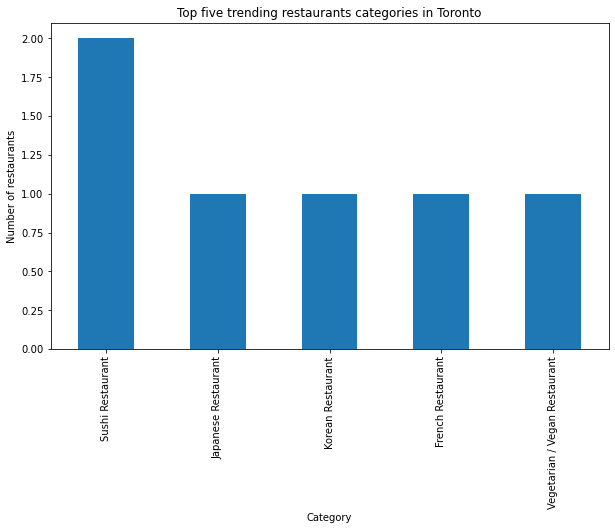

In [40]:
#plotting the top five restaurant categories
trending_restaurants.plot(kind='bar', figsize=(10, 6), legend=None)

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Number of restaurants') # add y-label to the plot
plt.title('Top five trending restaurants categories in Toronto') # add title to the plot

plt.show()

In [41]:
#counting hotels in each area to evaluate potential
hotels_count = clustered_hotels['cluster_label'].value_counts().rename_axis('cluster').reset_index(name='counts')
hotels_count

,cluster,counts
0,2,6
1,1,3
2,0,1
